In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


df = pd.read_csv("airData_cleaned.csv")

colNames = df.columns.to_numpy()  # Convert to NumPy array
print(colNames)
summary = df.describe()
print(summary)

any_na = df.isna().any()

# Print columns with NaN values, if any
if any_na.any():
    columns_with_na = any_na[any_na].index
    print("Columns with NaN values:")
    for col in columns_with_na:
        num_na = df[col].isna().sum()
        print(f"{col}: {num_na}")
else:
    print("No columns have NaN values.")
df.shape

# Cleaned data in excel for Gender(filled with Male), FrequentFlightDestination(Picked one value from multiple values(used max repeating value in Airline-Destination combination))- done manually in Excel
df = df[df['Airline'].notnull()]
df = df[df['Destination'] != 4]

df.shape


# FUNCTION TO PRINT UNIQUE COMBINATIONS FOR A  GIVEN SET OF FEATURES
def print_unique_combinations(variable_names):
    """
    Print unique combinations of variables along with their counts in the DataFrame.

    Parameters:
    -----------
    variable_names : list of str
        A list of variable names for which unique combinations and counts are to be printed.

    Returns:
    --------
    None

    Notes:
    ------
    - This function prints the unique combinations of variables specified by variable_names along with their counts.
    - It retrieves the unique combinations and their counts using value_counts() function applied to the DataFrame.
    - The output is printed in a tabular format where each row represents a unique combination of variables along with its count.

    Example:
    --------
    >>> print_unique_combinations(['Airline','Destination'])
    """

    unique_combinations = df[variable_names].value_counts().reset_index()
    unique_combinations = unique_combinations.rename(columns={0: 'count'})
    print(unique_combinations)

    
    
# FUNCTION TO FILL MISSING DATA FOR A GIVEN VARIABLE(REFERENCE VARIABLE) BASED ON ONE RELATED VARIABLE
def impute_missing_data_one(reference_variable, variable_names, threshold):
    """
    Impute missing values in a DataFrame based on a reference variable and related variables.

    Parameters:
    -----------
    reference_variable : str
        The variable containing missing values to be imputed.
    variable_names : list of str
        A list of variable names used to identify unique combinations.
    threshold : int
        The minimum count threshold for considering a combination of variables.

    Returns:
    --------
    None

    Notes:
    ------
    - This function imputes missing values in the DataFrame based on the average value of the reference_variable
      for unique combinations of variable_names.
    - It prints the unique combinations of variable_names and their counts, filtered combinations based on the threshold,
      and the average values calculated for filtered combinations.
    - Finally, it updates the DataFrame with the imputed values and prints the remaining null values in the reference_variable.

    Example:
    --------
    >>> impute_missing_data_one('Airfare','Airline',81)
    """
    missing_rows = df[df[reference_variable].isnull()]
    unique_combinations = df[variable_names].value_counts()
    print(unique_combinations)

    # Filter combinations based on the threshold
    filtered_combinations = unique_combinations[unique_combinations >= threshold].index

    # Calculate average value for each filtered combination
    average_values = df.groupby(variable_names)[reference_variable].mean().loc[filtered_combinations].round()
    
    average_values = average_values.rename(f'average_{reference_variable}')
    print("\nAVERAGE VALUES\n")
    print(average_values)

      
    df.loc[missing_rows.index, reference_variable] = missing_rows.apply(
    lambda row: average_values.loc[(row[variable_names])] if (row[variable_names]) in average_values.index else row[reference_variable],
    axis=1
)

    # Print the updated DataFrame shape
    print(f"\nNull values remaining in {reference_variable} after imputation:\n", df[df[reference_variable].isnull()].shape)
    missing_rows = df[df[reference_variable].isnull()]
    print(missing_rows)
    print("Shape of DataFrame:", df.shape)


    
# FUNCTION TO FILL MISSING DATA FOR A GIVEN VARIABLE(REFERENCE VARIABLE) BASED ON MANY RELATED VARIABLES
def impute_missing_data_many(reference_variable, variable_names, threshold):
    """
    Impute missing values in a DataFrame based on a reference variable and multiple related variables.

    Parameters:
    -----------
    reference_variable : str
        The variable containing missing values to be imputed.
    variable_names : list of str
        A list of variable names used to identify unique combinations.
    threshold : int
        The minimum count threshold for considering a combination of variables.

    Returns:
    --------
    None

    Notes:
    ------
    - This function imputes missing values in the DataFrame based on the average value of the reference_variable
      for unique combinations of variable_names.
    - It prints the unique combinations of variable_names and their counts, filtered combinations based on the threshold,
      and the average values calculated for filtered combinations.
    - Finally, it updates the DataFrame with the imputed values and prints the remaining null values in the reference_variable.

    Example:
    --------
    >>> impute_missing_data_many('Airfare',['Airline','Destination'],24) 
    """
    missing_rows = df[df[reference_variable].isnull()]
    unique_combinations = df[variable_names].value_counts()
    print(unique_combinations)

    # Filter combinations based on the threshold
    filtered_combinations = unique_combinations[unique_combinations >= threshold].index

    # Calculate average value for each filtered combination
    average_values = df.groupby(variable_names)[reference_variable].mean().loc[filtered_combinations].round()
    average_values = average_values.rename(f'average_{reference_variable}')

    
    print("\nAVERAGE VALUES\n")
    print(average_values)

      
    df.loc[missing_rows.index, reference_variable] = missing_rows.apply(
    lambda row: average_values.loc[(row[variable_names[0]],row[variable_names[1]])] if (row[variable_names[0]],row[variable_names[1]]) in average_values.index else row[reference_variable],
    axis=1
)


    # Print the updated DataFrame shape
    print(f"\nNull values remaining in {reference_variable} after imputation:\n", df[df[reference_variable].isnull()].shape)
    missing_rows = df[df[reference_variable].isnull()]
    print(missing_rows)
    print("Shape of DataFrame:", df.shape)


    
# FILLING MISSING VALUES USING OTHER RELEVANT COMBINATIONS


# AIRFARE:

print_unique_combinations(['Airline','Destination'])
impute_missing_data_many('Airfare',['Airline','Destination'],24) 
print_unique_combinations('Airline')
impute_missing_data_one('Airfare','Airline',81)

print(df.loc[471, 'Airfare'])



# Income - Occupation, SeatClass

print_unique_combinations(['Occupation','SeatClass'])
impute_missing_data_many('Income',['Occupation','SeatClass'],24) 
print_unique_combinations('Occupation')
impute_missing_data_one('Income','Occupation', 1)




# Departure_Hr - Departure_Time, Airlines

print_unique_combinations(['DepartureTime','Airline'])
impute_missing_data_many('DepartureHr',['DepartureTime','Airline'],10) 
print_unique_combinations('DepartureTime')
impute_missing_data_one('DepartureHr','DepartureTime',25) 




# AccessTime - ModeTransport, Airport,Departure_Time

print_unique_combinations(['ModeTransport','Airport'])
impute_missing_data_many('AccessTime',['ModeTransport','Airport'],15) 
print_unique_combinations('Airport')
impute_missing_data_one('AccessTime','Airport',1) 




# Destination - Airport, Airline, DepartureTime

print_unique_combinations(['Airline','DepartureTime'])
impute_missing_data_many('Destination',['Airline','DepartureTime'],15) 




# Check if any column contains NaN values
any_na = df.isna().any()

# Find out the number of missing values in each column
missing_counts = df.isna().sum()

# Calculate the percentage of missing values for each column
total_rows = len(df)
percent_missing = (missing_counts / total_rows) * 100

# Create a list of lists to hold the data
table_data = []
if any_na.any():
    for col in any_na.index[any_na]:
        table_data.append([col, missing_counts[col], f"{percent_missing[col]:.2f}%"])


print("\nColumns with missing values > 30%: \n")
filtered_cols = percent_missing[percent_missing > 30]
print(filtered_cols)

columns_to_drop = ['ID','FlightNo','AccessCost', 'MileageAirline', 'Mileage','DepartureMn']
df.drop(columns=columns_to_drop, inplace=True)



#CALCULATING CHOICE PROBABLITIES (AIRPORT)

# FUNCTION TO CALCULATE CHOICE PROBABILITIES FOR CATEGORICAL VARIABLES (AIRPORT MODEL)
def calculate_gini_probabilities(df, variable_name, num_categories):
    """
    Calculate probabilities and observations count for each category of a variable, 
    considering the occurrences in different airport categories.

    Parameters:
    -----------
    df : DataFrame
        The DataFrame containing the data.
    variable_name : str
        The name of the variable for which probabilities and counts are to be calculated.
    num_categories : int
        The number of categories in the variable.

    Returns:
    --------
    None

    Notes:
    ------
    - This function calculates the probabilities of each category of the variable considering the occurrences
      in different airport categories.
    - It counts the occurrences of each variable-airport combination and calculates the probabilities
      based on the total occurrences of each variable category.
    - The probabilities are rounded to one decimal place.
    - The function also prints the count of each variable-airport combination and the resulting probabilities
      along with the total number of observations in each category of the variable.

    Example:
    --------
    >>> calculate_gini_probabilities(df, 'Airline', 4)  
    """
   
    # Count occurrences of each variable-airport combination
    variable_airport_counts = df.groupby([variable_name, 'Airport']).size().unstack(fill_value=0)
    print("\nCOUNT OF {}-AIRPORT COMBINATIONS\n".format(variable_name.upper()))
    print(variable_airport_counts)
    
    variable_airport_probabilities = variable_airport_counts.div(variable_airport_counts.sum(axis=1), axis=0).round(1)

    variable_counts = df[variable_name].value_counts()
    
    # Sort the index of variable_airport_probabilities dataframe
    variable_airport_probabilities_sorted = variable_airport_probabilities.sort_index()
    
    # Concatenate probabilities and Number of Observations in each category of variable
    result = pd.concat([variable_airport_probabilities_sorted, variable_counts], axis=1)
    
    # Rename the count column
    result.rename(columns={variable_name: 'No_Of_Observations'}, inplace=True)
    
    # Print the result
    print("\nProbabilities along with Total no of observations\n")
    print(result)

calculate_gini_probabilities(df, 'Airline', 4)  
calculate_gini_probabilities(df, 'Gender', 2)  
calculate_gini_probabilities(df, 'Nationality', 5)  
calculate_gini_probabilities(df, 'TripPurpose', 4)  
calculate_gini_probabilities(df, 'ProvinceResidence', 8)  
calculate_gini_probabilities(df, 'GroupTravel', 2)  
calculate_gini_probabilities(df, 'FrequentFlightDestination', 7)  
calculate_gini_probabilities(df, 'Destination', 3) 
calculate_gini_probabilities(df, 'DepartureTime', 4)  
calculate_gini_probabilities(df, 'SeatClass', 3)  
calculate_gini_probabilities(df, 'ModeTransport', 11)  
calculate_gini_probabilities(df, 'Occupation', 12)  
calculate_gini_probabilities(df, 'Income', 7)  





# FUNCTION TO CALCULATE CHOICE PROBABILITIES FOR CONTINUOS VARIABLES (AIRPORT MODEL)
def calculate_gini_probabilities_continuous(df, variable_name):
       
    # Calculate the mean of the continuous variable for each airport category
    mean_variable_airport = df.groupby('Airport')[variable_name].mean()
    print("\nMEAN VALUE OF {} FOR EACH AIRPORT\n".format(variable_name.upper()))
    print(mean_variable_airport)
    

# Example usage:
calculate_gini_probabilities_continuous(df, 'Age')  
calculate_gini_probabilities_continuous(df, 'TripDuration') 
calculate_gini_probabilities_continuous(df, 'FlyingCompanion')  
calculate_gini_probabilities_continuous(df, 'NoTripsLastYear')  
calculate_gini_probabilities_continuous(df, 'DepartureHr')  
calculate_gini_probabilities_continuous(df, 'Airfare')
calculate_gini_probabilities_continuous(df, 'NoTransport')  
calculate_gini_probabilities_continuous(df, 'AccessTime')  






#CALCULATING CHOICE PROBABLITIES (AIRLINE)


df['Airline_Category'] = df['Airline'].map({1: 1, 2: 2, 3: 1, 4: 2})

# FUNCTION TO CALCULATE CHOICE PROBABILITIES FOR CATEGORICAL VARIABLES (AIRLINE MODEL)
def calculate_gini_probabilities_Airlines(df, variable_name, num_categories):
   
    # Count occurrences of each variable-airport combination
    variable_airline_counts = df.groupby([variable_name, 'Airline_Category']).size().unstack(fill_value=0)
    print("\nCOUNT OF {}-Airline COMBINATIONS\n".format(variable_name.upper()))
    print(variable_airline_counts)
    
    variable_airline_probabilities = variable_airline_counts.div(variable_airline_counts.sum(axis=1), axis=0).round(1)

    variable_counts = df[variable_name].value_counts()
    
    # Sort the index of variable_airport_probabilities dataframe
    variable_airline_probabilities_sorted = variable_airline_probabilities.sort_index()
    
    # Concatenate probabilities and Number of Observations in each category of variable
    result = pd.concat([variable_airline_probabilities_sorted, variable_counts], axis=1)
    
    # Rename the count column
    result.rename(columns={variable_name: 'No_Of_Observations'}, inplace=True)
    
    # Print the result
    print("\nProbabilities along with Total no of observations\n")
    print(result)

calculate_gini_probabilities_Airlines(df, 'Airport', 4)  
calculate_gini_probabilities_Airlines(df, 'Gender', 2)  
calculate_gini_probabilities_Airlines(df, 'Nationality', 5)  
calculate_gini_probabilities_Airlines(df, 'TripPurpose', 4)  
calculate_gini_probabilities_Airlines(df, 'ProvinceResidence', 8)  
calculate_gini_probabilities_Airlines(df, 'GroupTravel', 2)  
calculate_gini_probabilities_Airlines(df, 'FrequentFlightDestination', 7)  
calculate_gini_probabilities_Airlines(df, 'Destination', 3) 
calculate_gini_probabilities_Airlines(df, 'DepartureTime', 4)  
calculate_gini_probabilities_Airlines(df, 'SeatClass', 3)  
calculate_gini_probabilities_Airlines(df, 'ModeTransport', 11)  
calculate_gini_probabilities_Airlines(df, 'Occupation', 12)  
calculate_gini_probabilities_Airlines(df, 'Income', 7)  




# FUNCTION TO CALCULATE CHOICE PROBABILITIES FOR CONTINUOS VARIABLES (AIRPORT MODEL)
def calculate_gini_probabilities_continuous_Airlines(df, variable_name):
       
    # Calculate the mean of the continuous variable for each airport category
    mean_variable_airline = df.groupby('Airline_Category')[variable_name].mean()
    print("\nMEAN VALUE OF {} FOR EACH Airline\n".format(variable_name.upper()))
    print(mean_variable_airline)


# Example usage:
calculate_gini_probabilities_continuous_Airlines(df, 'Age')  
calculate_gini_probabilities_continuous_Airlines(df, 'TripDuration') 
calculate_gini_probabilities_continuous_Airlines(df, 'FlyingCompanion')  
calculate_gini_probabilities_continuous_Airlines(df, 'NoTripsLastYear')  
calculate_gini_probabilities_continuous_Airlines(df, 'DepartureHr')  
calculate_gini_probabilities_continuous_Airlines(df, 'Airfare')
calculate_gini_probabilities_continuous_Airlines(df, 'NoTransport')  
calculate_gini_probabilities_continuous_Airlines(df, 'AccessTime')  




# ANOVA TEST

alpha = 0.05


column_headers = df.columns.tolist()
for i in column_headers:
    group1 = df[df['Airport'] == 1][i]
    group2 = df[df['Airport'] == 2][i]

    # Perform ANOVA
    f_statistic, p_value = stats.f_oneway(group1, group2)

    # Print the results
    print("Airport vs " +i)
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)



for i in column_headers:
    group1 = df[df['Airline'] == 1][i]
    group2 = df[df['Airline'] == 2][i]

    # Perform ANOVA
    f_statistic, p_value = stats.f_oneway(group1, group2)

    # Print the results
    print("Airline vs " +i)
    print("F-statistic:", f_statistic)
    print("P-value:", p_value)

                                



['ID' 'Airport' 'Airline' 'Age' 'Gender' 'Nationality' 'TripPurpose'
 'TripDuration' 'FlyingCompanion' 'ProvinceResidence' 'GroupTravel'
 'NoTripsLastYear' 'FrequentFlightDestination' 'Destination' 'FlightNo'
 'DepartureHr' 'DepartureMn' 'DepartureTime' 'SeatClass' 'Airfare'
 'NoTransport' 'ModeTransport' 'AccessCost' 'AccessTime' 'Occupation'
 'Income' 'MileageAirline' 'Mileage']
               ID     Airport     Airline         Age      Gender  \
count  488.000000  488.000000  478.000000  487.000000  488.000000   
mean   244.500000    1.510246    2.422594   39.965092    1.524590   
std    141.017729    0.500408    1.208492   13.672869    0.499907   
min      1.000000    1.000000    1.000000   17.000000    1.000000   
25%    122.750000    1.000000    1.000000   29.000000    1.000000   
50%    244.500000    2.000000    2.000000   38.000000    2.000000   
75%    366.250000    2.000000    4.000000   50.000000    2.000000   
max    488.000000    2.000000    4.000000   80.000000    2.00000

      1    2  No_Of_Observations
1   0.5  0.5                  33
2   0.4  0.6                 113
3   0.4  0.6                  16
4   0.8  0.2                   6
5   0.6  0.4                  29
6   0.8  0.2                   4
7   0.6  0.4                  18
8   0.4  0.6                  50
9   0.5  0.5                  55
10  0.5  0.5                   8
11  0.5  0.5                  12
12  0.5  0.5                 112

COUNT OF INCOME-Airline COMBINATIONS

Airline_Category   1    2
Income                   
1.0               23   25
2.0               39   51
3.0               95  100
4.0               34   26
5.0               16   16
6.0               10    8
7.0                8    5

Probabilities along with Total no of observations

       1    2  No_Of_Observations
1.0  0.5  0.5                  48
2.0  0.4  0.6                  90
3.0  0.5  0.5                 195
4.0  0.6  0.4                  60
5.0  0.5  0.5                  32
6.0  0.6  0.4                  18
7.0  0.6

C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())
C:\Users\rahul\Anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


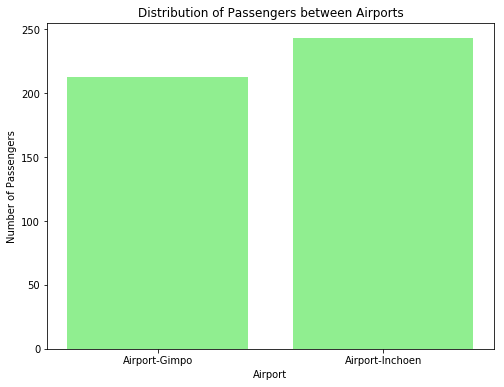

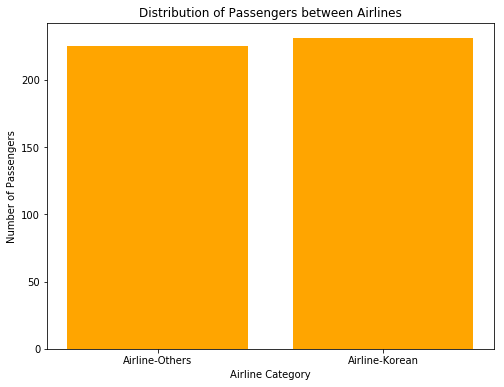

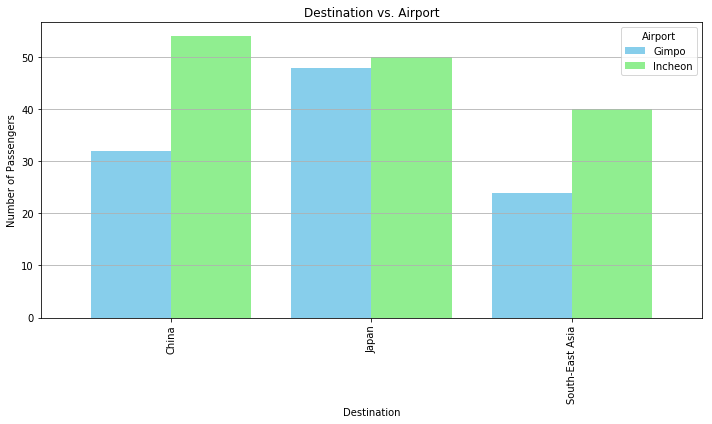

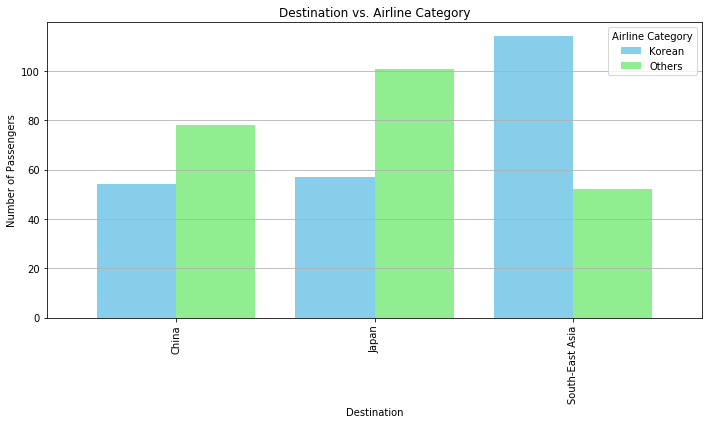

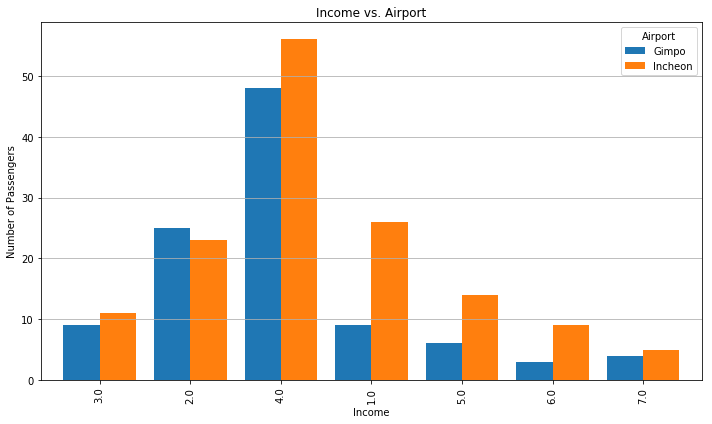

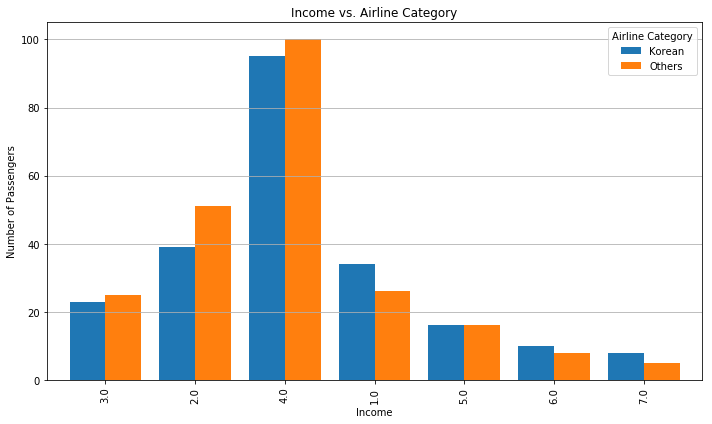

In [7]:
# PLOTS

# Plot distribution of passengers between the two airports

airport_counts = df['Airport'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(airport_counts.index, airport_counts.values, color=['lightgreen'])
plt.title('Distribution of Passengers between Airports')
plt.xlabel('Airport')
plt.ylabel('Number of Passengers')
plt.xticks(airport_counts.index, ['Airport-Inchoen', 'Airport-Gimpo'])
plt.show()

# Plot distribution of passengers between the two airlines
airline_counts = df['Airline_Category'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(airline_counts.index, airline_counts.values, color=['orange'])
plt.title('Distribution of Passengers between Airlines')
plt.xlabel('Airline Category')
plt.ylabel('Number of Passengers')
plt.xticks(airline_counts.index, ['Airline-Korean', 'Airline-Others'])
plt.show()

df['Airline_Category1'] = df['Airline'].map({1: "Korean", 2: "Others", 3: "Korean", 4: "Others"})
df['Airport_Category1'] = df['Airline'].map({1: "Incheon", 2: "Gimpo"})


# Plot Destination vs. Airport
plt.figure(figsize=(10, 6))
destination_counts = df['Destination'].value_counts()
airport_counts = df.groupby('Destination')['Airport_Category1'].value_counts().unstack(fill_value=0)
airport_counts.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen', 'salmon'], width=0.8)
plt.title('Destination vs. Airport')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.xticks(range(len(destination_counts)), ['China', 'Japan', 'South-East Asia'])  
plt.legend(title='Airport')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Destination vs. Airline Category
plt.figure(figsize=(10, 6))
airline_counts = df.groupby('Destination')['Airline_Category1'].value_counts().unstack(fill_value=0)
airline_counts.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightgreen'], width=0.8)
plt.title('Destination vs. Airline Category')
plt.xlabel('Destination')
plt.ylabel('Number of Passengers')
plt.xticks(range(len(destination_counts)), ['China', 'Japan', 'South-East Asia']) 
plt.legend(title='Airline Category')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# Plot Income vs. Airport
plt.figure(figsize=(10, 6))
income_counts = df['Income'].value_counts()
airport_counts = df.groupby('Income')['Airport_Category1'].value_counts().unstack(fill_value=0)
airport_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Income vs. Airport')
plt.xlabel('Income')
plt.ylabel('Number of Passengers')
plt.xticks(range(len(income_counts)), income_counts.index)  
plt.legend(title='Airport')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Plot Income vs. Airline Category
plt.figure(figsize=(10, 6))
airline_counts = df.groupby('Income')['Airline_Category1'].value_counts().unstack(fill_value=0)
airline_counts.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Income vs. Airline Category')
plt.xlabel('Income')
plt.ylabel('Number of Passengers')
plt.xticks(range(len(income_counts)), income_counts.index)  
plt.legend(title='Airline Category')
plt.grid(axis='y')
plt.tight_layout()
plt.show()




In [14]:
#LOGISTIC REGRESSION MODEL(AIRPORT)

#Age
df['AccessTime<=40'] = np.where(df['AccessTime'] <= 40, 1, 0)
df['AccessTime>40'] = np.where(df['AccessTime'] > 40, 1, 0)

#TripDuration
df['TripDuration<=7'] = np.where(df['TripDuration'] <= 7, 1, 0)
df['TripDuration>7'] = np.where(df['TripDuration'] > 7, 1, 0)


#NoTripsLastYear
df['NoTripsLastYear<=3'] = np.where(df['NoTripsLastYear'] <= 3, 1, 0)
df['NoTripsLastYear>3'] = np.where(df['NoTripsLastYear'] > 3, 1, 0)


#Creating dummy variables for Airline
df['Airline(Korean)'] = np.where(df['Airline'].isin([1,3]), 1, 0)
df['Airline(Asiana and Foreign)'] = np.where(df['Airline'].isin([2,4]), 1, 0)


#Creating dummy variables for Gender
df['Male'] = np.where(df['Gender']== 1, 1, 0)
df['Female'] = np.where(df['Gender']== 2, 1, 0)

#Creating dummy variables for Nationality
df['Nationality(Korean and Other)'] = np.where(df['Nationality'].isin([1,4,5]), 1, 0)
df['Nationality(China)'] = np.where(df['Nationality'].isin([2]), 1, 0)
df['Nationality(Japan)'] = np.where(df['Nationality'].isin([3]), 1, 0)


#Creating dummy variables for TripPurpose      
df['TripPurpose-Leisure'] = np.where(df['TripPurpose'].isin([1]), 1, 0)
df['TripPurpose-Business,Study, Other'] = np.where(df['TripPurpose'].isin([2, 3,4]), 1, 0)

    
#Creating dummy variables for ProvinceResidence
df['PR-Seoul,Others'] = np.where(df['ProvinceResidence'].isin([1,8]), 1, 0)
df['PR-Incheon,Kyungki,Chungcheong,Kangwon'] = np.where(df['ProvinceResidence'].isin([2, 3, 4, 7,5, 6]), 1, 0) #Reference


#Creating dummy variables for DepartureTime
df['Morning'] = np.where(df['DepartureTime'] == 1, 1, 0)
df['Afternoon'] = np.where(df['DepartureTime'] == 2, 1, 0)
df['Evening'] = np.where(df['DepartureTime'] == 3, 1, 0)
df['Night'] = np.where(df['DepartureTime'] == 4, 1, 0)


# Creating dummy variables for FrequentFlightDestination
df['FFD-SouthEast Asia'] = np.where(df['FrequentFlightDestination'].isin([1]), 1, 0)
df['FFD-China,Others'] = np.where(df['FrequentFlightDestination'].isin([2,6]), 1, 0)
df['FFD-Japan'] = np.where(df['FrequentFlightDestination'].isin([3]), 1, 0)
df['FFD-North & South America'] = np.where(df['FrequentFlightDestination'].isin([4]), 1, 0)
df['FFD-Europe & None'] = np.where(df['FrequentFlightDestination'].isin([5,7]), 1, 0)


#Creating dummy variables for Destination
df['Destination-China'] = np.where(df['Destination'] == 1, 1, 0)
df['Destination-Japan'] = np.where(df['Destination'].isin([2]), 1, 0)
df['Destination-SouthEast Asia'] = np.where(df['Destination'] == 3, 1, 0)


df['DepartureHr<=15'] = np.where(df['DepartureHr'] <= 15, 1, 0)
df['DepartureHr>15'] = np.where(df['DepartureHr'] > 15, 1, 0)  #reference

#Creating dummy variables for SeatClass
df['Economy'] = np.where(df['SeatClass'] == 1, 1, 0)
df['Business & First'] = np.where(df['SeatClass'].isin([2, 3]), 1, 0)

#Creating dummy variables for ModeTransport
df['ModeTransport1'] = np.where(df['ModeTransport'].isin([5,1,2,11]), 1, 0)
df['ModeTransport2'] = np.where(df['ModeTransport'].isin([3,4,6,9,10]), 1, 0)
df['ModeTransport3'] = np.where(df['ModeTransport'].isin([7,8]), 1, 0)
#df['ModeTransport4'] = np.where(df['ModeTransport'].isin([11]), 1, 0)


#Creating dummy variables for Occupation
df['OCC-Group1'] = np.where(df['Occupation'].isin([1,8,9,10,11]), 1, 0)
df['OCC-Group2'] = np.where(df['Occupation'].isin([2,4,5,6,7]), 1, 0)                           
df['OCC-Group3'] = np.where(df['Occupation'].isin([3,12]), 1, 0)
#df['OCC-Group4'] = np.where(df['Occupation'].isin([6,10]), 1, 0)  


#Creating dummy variables for Income
df['Income-Group1'] = np.where(df['Income'].isin([3]), 1, 0)
df['Income-Group2'] = np.where(df['Income'].isin([2,4,5,6,7]), 1, 0)  
df['Income-Group2'] = np.where(df['Income'].isin([1]), 1, 0)  


# LOGISTIC REGRESSION MODEL (AIRPORT)

df['intercept'] = 1.0

df['Airport(Inchoen)'] = df['Airport'].map({1: 1, 2: 0})
df['GroupTravelYes']=df['GroupTravel'].astype('category').cat.codes

y=df['Airport(Inchoen)']
X=df[['intercept', 'Airline(Korean)','FlyingCompanion','AccessTime<=40','DepartureHr<=15',
      'TripDuration<=7','GroupTravelYes','TripPurpose-Leisure', 
      'PR-Seoul,Others','Afternoon', 'Evening', 'Night','Airfare',
      'FFD-SouthEast Asia', 'FFD-China,Others', 'FFD-Japan','FFD-North & South America',
      'Destination-SouthEast Asia', 'Destination-China',
      'OCC-Group2','OCC-Group1',  'Income-Group1','Income-Group2']]

#Removed Male, Economy 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

#Female, Surrounding Area, Mode_of_transport_Category2, Night reference category
logit_model1 = sm.Logit(y_train, X_train).fit()
print(logit_model1.summary())


# Prediction
y_train_pred = logit_model1.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int) 
train_conf_matrix = pd.crosstab(y_train, y_train_pred_binary, rownames=['actual'],
colnames=['predicted'])
print("Training Confusion Matrix:")
print(train_conf_matrix)
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
precision_train = precision_score(y_train, y_train_pred_binary)
recall_train = recall_score(y_train, y_train_pred_binary)
print("Train Accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train Recall:", recall_train)

y_pred = logit_model1.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Converting probabilities to binary predictions
testing_conf_matrix = pd.crosstab(y_test,y_pred_binary,rownames
=['actual'],colnames=['predicted'])
print("Testing Confusion Matrix:")
print(testing_conf_matrix)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy)
print("Test precision:", precision)
print("Test Recall:", recall)



print("AIC:", logit_model1.aic)
print("BIC:", logit_model1.bic)


Optimization terminated successfully.
         Current function value: 0.188361
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:       Airport(Inchoen)   No. Observations:                  364
Model:                          Logit   Df Residuals:                      341
Method:                           MLE   Df Model:                           22
Date:                Sun, 10 Mar 2024   Pseudo R-squ.:                  0.7259
Time:                        17:03:19   Log-Likelihood:                -68.563
converged:                       True   LL-Null:                       -250.10
Covariance Type:            nonrobust   LLR p-value:                 1.632e-63
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
intercept                     -3.8690      1.930     -2.005      0.045      

In [9]:
# LOGISTIC REGRESSION MODEL (AIRLINE) 

df['Airline(Korean)'] = df['Airline'].map({1: 1, 2: 0, 3: 1, 4: 0})

#Creating dummy variables for Airport
df['Airport(Incheon)'] = np.where(df['Airport']==1, 1, 0)
df['Airport(Gimpo)'] = np.where(df['Airport']==2, 1, 0) #reference


#Creating dummy variables for TripDuration
df['TripDuration<=5'] = np.where(df['TripDuration'] <= 5, 1, 0)
df['TripDuration>5'] = np.where(df['TripDuration'] > 5, 1, 0)  #reference

#Creating dummy variables for DepartureHr
df['DepartureHr1'] = np.where(df['DepartureHr'] <= 15, 1, 0)
df['DepartureHr2'] = np.where(df['DepartureHr'] > 15, 1, 0)  #reference


# Creating dummy variables for FrequentFlightDestination
df['FrequentDestination(SEAsia)'] = np.where(df['FrequentFlightDestination'].isin([1]), 1, 0) #SE Asia
df['FrequentDestination(Japan)'] = np.where(df['FrequentFlightDestination'].isin([3,7]), 1, 0) #Japan, None
df['FrequentDestination(Others)'] = np.where(df['FrequentFlightDestination'].isin([2,4,5,6]), 1, 0) #China, NA/SA, Europe, other - reference



#Creating dummy variables for Destination
df['Destination(China)'] = np.where(df['Destination'] .isin([1]), 1, 0) #China
df['Destination(Japan)'] = np.where(df['Destination'].isin([2]), 1, 0) #Japan
df['Destination(SEAsia)'] = np.where(df['Destination'].isin([3]), 1, 0) #SE Asia - reference



#Creating dummy variables for SeatClass
df['SeatClass(Economy)'] = np.where(df['SeatClass'].isin([1]), 1, 0) #Economy
df['SeatClass(Business,First)'] = np.where(df['SeatClass'].isin([2,3]), 1, 0) #Business, First Class - reference


#Creating dummy variables for Occupation
df['Occupation(Business)'] = np.where(df['Occupation'].isin([2]), 1, 0) #Business
df['Occupation(Others)'] = np.where(df['Occupation'].isin([3,8,12,1,9,10,11,4,5,6,7]), 1, 0)  #Other - reference
 


#Creating dummy variables for Income
df['IncomeGroup(30-80)'] = np.where(df['Income'].isin([2,3]), 1, 0) #30-80 Million Won
df['Income-Group(<30&>80)'] = np.where(df['Income'].isin([1,4,5,6,7]), 1, 0) #<30&>80 Million Won - reference



# LOGISTIC REGRESSION MODEL (AIRLINE)


y=df['Airline(Korean)']
X=df[['intercept', 'Airport(Incheon)',  'Airfare','TripDuration<=5','AccessTime<=40','FlyingCompanion','DepartureHr1',
      'Night', 'Afternoon', 'Evening',  'FrequentDestination(SEAsia)','FrequentDestination(Japan)',
       'Destination(China)','Destination(Japan)','SeatClass(Economy)', 'Occupation(Business)','IncomeGroup(30-80)']]
         
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109)

logit_model2 = sm.Logit(y_train, X_train).fit()
print(logit_model2.summary())


# Prediction
y_train_pred = logit_model2.predict(X_train)
y_train_pred_binary = (y_train_pred > 0.5).astype(int) 
train_conf_matrix = pd.crosstab(y_train, y_train_pred_binary, rownames=['actual'],
colnames=['predicted'])
print("Training Confusion Matrix:")
print(train_conf_matrix)
accuracy_train = accuracy_score(y_train, y_train_pred_binary)
precision_train = precision_score(y_train, y_train_pred_binary)
recall_train = recall_score(y_train, y_train_pred_binary)
print("Train Accuracy:", accuracy_train)
print("Train precision:", precision_train)
print("Train Recall:", recall_train)

y_pred = logit_model2.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)  # Converting probabilities to binary predictions
testing_conf_matrix = pd.crosstab(y_test,y_pred_binary,rownames
=['actual'],colnames=['predicted'])
print("Testing Confusion Matrix:")
print(testing_conf_matrix)
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
print("Test Accuracy:", accuracy)
print("Test precision:", precision)
print("Test Recall:", recall)


print("AIC:", logit_model2.aic)
print("BIC:", logit_model2.bic)


Optimization terminated successfully.
         Current function value: 0.520214
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        Airline(Korean)   No. Observations:                  364
Model:                          Logit   Df Residuals:                      347
Method:                           MLE   Df Model:                           16
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.2495
Time:                        17:50:52   Log-Likelihood:                -189.36
converged:                       True   LL-Null:                       -252.30
Covariance Type:            nonrobust   LLR p-value:                 4.027e-19
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
intercept                       2.9259      1.019      2.872      0.004   